# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib widget

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.   # 249
mice_count = combined_data_df["Mouse ID"].nunique()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.   #g989
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# duplicate_drop_df = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
cleaned_df = combined_data_df[combined_data_df["Mouse ID"] != "g989"]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.   # 248
new_mice_count = cleaned_df["Mouse ID"].nunique()
new_mice_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#######################################################################################################################################

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_volume_mean = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
tumor_volume_median = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
tumor_volume_var = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
tumor_volume_std = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
tumor_volume_sem = cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean, 
                                      "Median Tumor Volume": tumor_volume_median, 
                                      "Tumor Volume Variance": tumor_volume_var, 
                                      "Tumor Volume Std. Dev.": tumor_volume_std, 
                                      "Tumor Volume Std. Err.": tumor_volume_sem})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#######################################################################################################################################

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_aggregation =  cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_statistics_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
mouse_ID_count = cleaned_df.groupby("Drug Regimen")["Mouse ID"].count()
mouse_ID_count_sorted = mouse_ID_count.sort_values(ascending = False)
mouse_ID_count_sorted

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

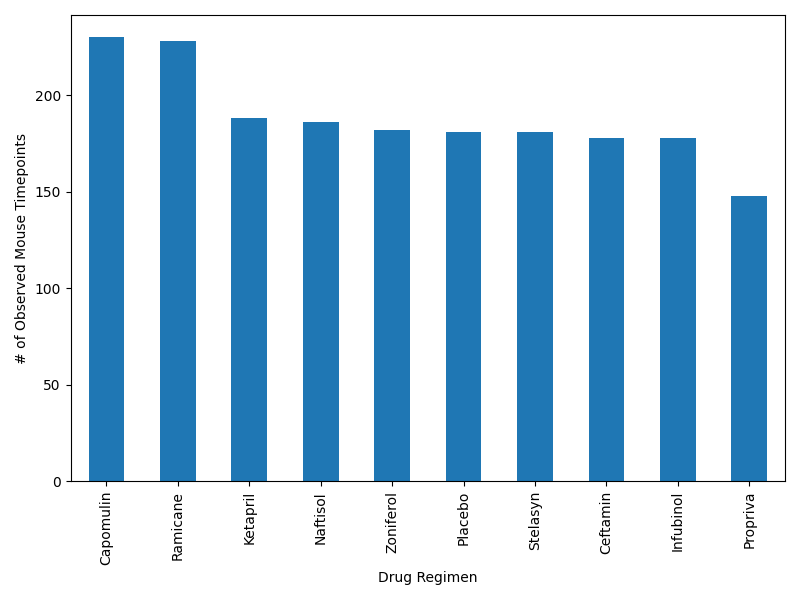

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.   
plt.figure()   # Creates new figure so it doesn't overwrite the previous figures
mouse_count_chart_pandas = mouse_ID_count_sorted.plot(kind = "bar", figsize = (8, 6),
                                         xlabel = "Drug Regimen",
                                         ylabel = "# of Observed Mouse Timepoints")
xticklabels = mouse_ID_count_sorted.index
plt.tight_layout()
plt.show()
# I don't know how to get this in not alphabetical order like the solution picture??

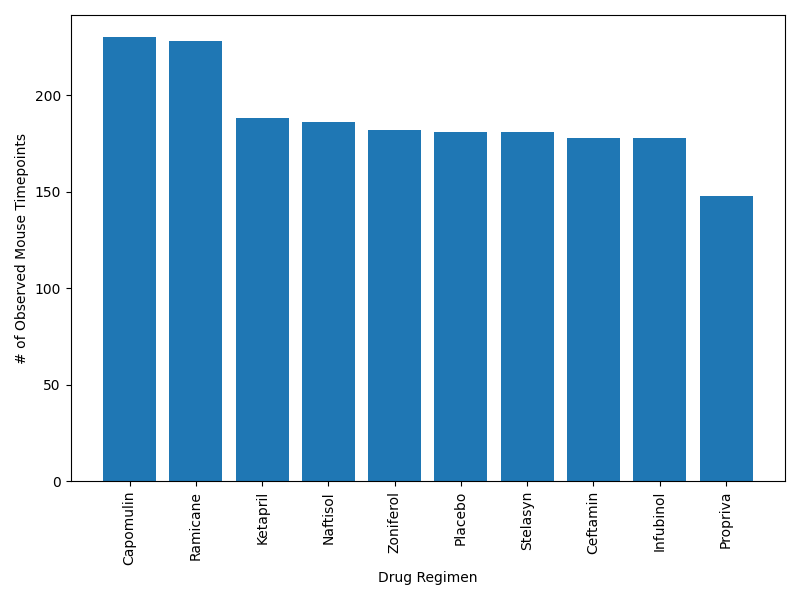

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize = (8, 6))   # Creates new figure so it doesn't overwrite the previous figures
plt.bar(mouse_ID_count_sorted.index, mouse_ID_count_sorted.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# Get the unique mice with their gender
mouse_sex_distribution = cleaned_df.groupby("Sex")["Mouse ID"].nunique()
mouse_sex_distribution_sorted = mouse_sex_distribution.sort_values(ascending = False)

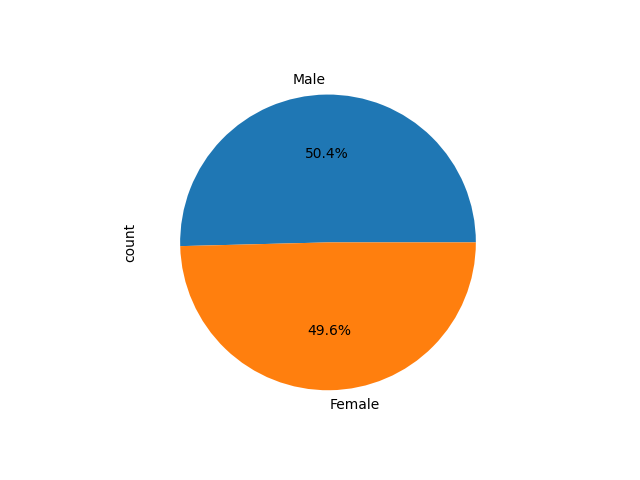

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
plt.figure()   # Creates new figure so it doesn't overwrite the previous figures
mouse_sex_distribution_chart_pandas = mouse_sex_distribution_sorted.plot(kind = "pie", autopct = "%1.1f%%")
mouse_sex_distribution_chart_pandas.set_ylabel("count")
plt.show()

In [15]:
#plt.clf()

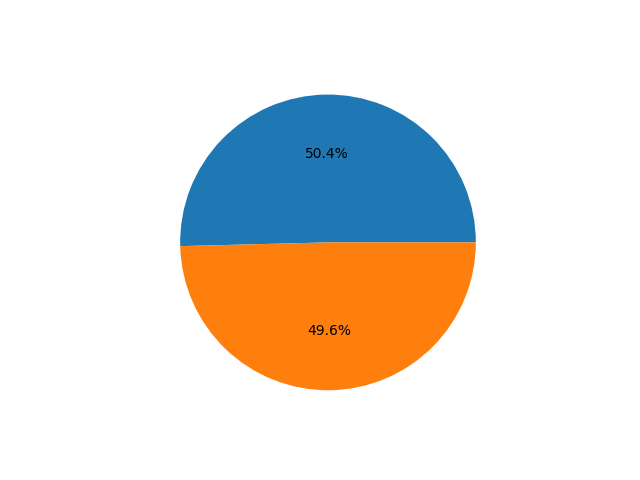

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure()   # Creates new figure so it doesn't overwrite the previous figures
plt.pie(mouse_sex_distribution_sorted.values, autopct = "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
#######################################################################################################################################

# Start by getting the last (greatest) timepoint for each mouse
drug_filtered_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") | 
                                  (cleaned_df["Drug Regimen"] == "Ramicane") |
                                  (cleaned_df["Drug Regimen"] == "Infubinol") |
                                  (cleaned_df["Drug Regimen"] == "Ceftamin")]
#drug_filtered_df

greatest_timepoint = drug_filtered_df.groupby("Mouse ID")["Timepoint"].max()
#greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(greatest_timepoint, drug_filtered_df, on = ["Mouse ID","Timepoint"])
#final_tumor_volume_df
final_tumor_volume_reduced_df = final_tumor_volume_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
#final_tumor_volume_reduced_df.set_index('Mouse ID', inplace = True)
final_tumor_volume_reduced_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Create empty dictionary to fill with outliers
tumor_volume_outliers = {}

In [19]:
# Locate the rows which contain mice on each drug and get the tumor volumes and add the subset
for treatment in treatments:
    
    drug_tumor_volumes = final_tumor_volume_reduced_df[final_tumor_volume_reduced_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volume_data.append(drug_tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    #quartiles = drug_tumor_volumes["Tumor Volume (mm3)"].quantile([0.25, 0.50, 0.75])
    lower_quartile = drug_tumor_volumes.quantile(0.25)
    upper_quartile = drug_tumor_volumes.quantile(0.75)
    iqr = upper_quartile - lower_quartile

    # Calculate lower and upper bounds to determine outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + ( 1.5 * iqr)

    # Store the outliers
    tumor_volume_outliers[treatment] = drug_tumor_volumes[(drug_tumor_volumes < lower_bound) | (drug_tumor_volumes > upper_bound)]
    
tumor_volume_outliers

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 15    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

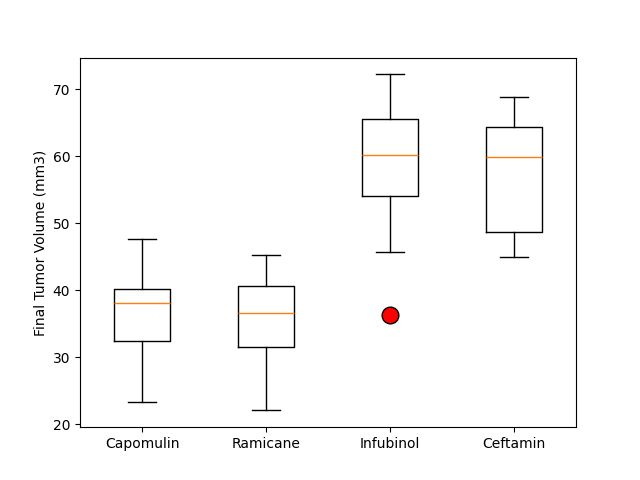

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(tumor_volume_data, labels = treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
#plt.title("Final Tumor Volume by Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
#plt.xlabel("Treatment")
plt.show()

## Line and Scatter Plots

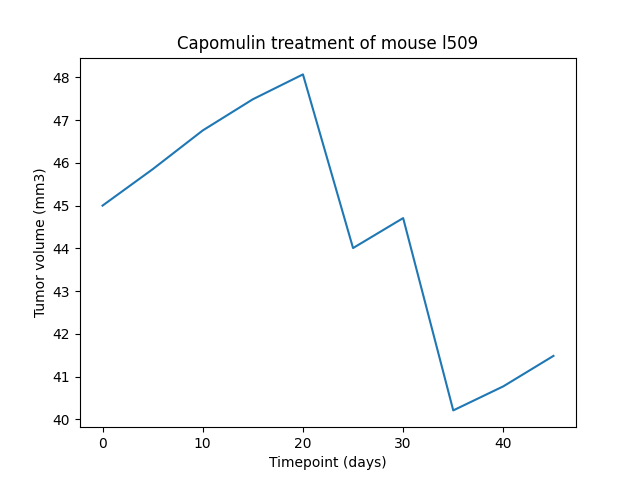

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (l509)

plt.figure()
l509_df = cleaned_df.loc[(cleaned_df["Mouse ID"] == "l509")]
#l509_df

#timepoint_values = l509_df["Timepoint"]
#plt.plot(timepoint_values, l509_df["Tumor Volume (mm3)"])

plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
#capomulin_df

mouse_tumor_volume_mean = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
#print(mouse_tumor_volume_mean.head())

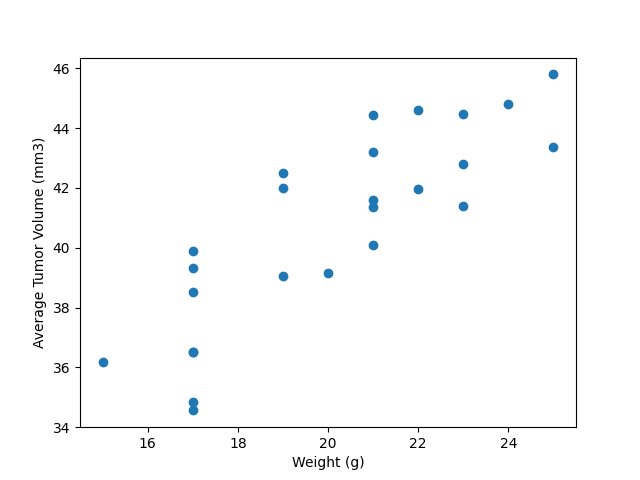

In [23]:
plt.figure()
plt.scatter(mouse_tumor_volume_mean["Weight (g)"], mouse_tumor_volume_mean["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = mouse_tumor_volume_mean["Weight (g)"].corr(mouse_tumor_volume_mean["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and the average tumor volume is {correlation: .2f}')

The correlation between mouse weight and the average tumor volume is  0.84


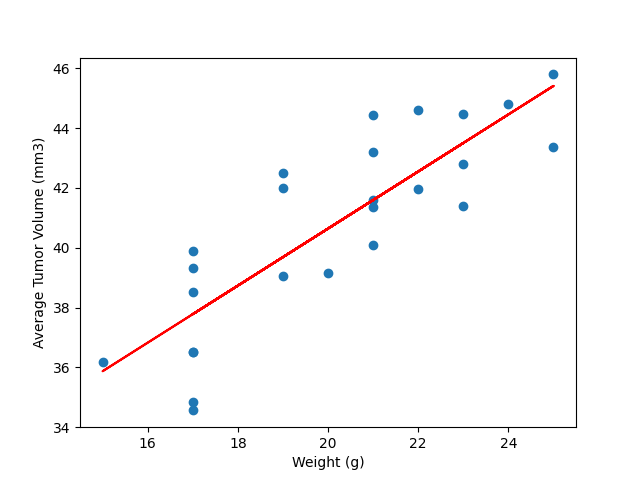

In [28]:
# Prepare data for linear regression
x = mouse_tumor_volume_mean["Weight (g)"].values.reshape(-1, 1)  # Feature
y = mouse_tumor_volume_mean["Tumor Volume (mm3)"].values  # Target

# Create a linear regression model
model = LinearRegression()
model.fit(x, y)

# Predict values
predictions = model.predict(x)

# Plot the results
plt.figure()
plt.scatter(mouse_tumor_volume_mean["Weight (g)"], mouse_tumor_volume_mean["Tumor Volume (mm3)"])
plt.plot(mouse_tumor_volume_mean["Weight (g)"], predictions, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()